# Simulación de MRO 

La idea de éste notebook es hacer una simulación de las trayectorias de las partículas cargadas en una placa en el plano XY, bajo un campo magnético constante $ \vec{B} = B \hat{e}_z $. Ésto conduce al efecto Hall, y por la fuerza de Lorentz obtenemos trayectorias espirales. 
$$ \vec{F} = q ( \vec{E} + \vec{v} \times \vec{B}) = m\vec{\ddot{\gamma}}$$ 
$$ \vec{E} = (V_x, -y V_H , 0)$$ 
$$ \vec{F} = q(V_x + B_z \dot{\gamma}_y , -(y V_H + B_z \dot{\gamma}_x))$$ 
$$ V_H = vB_z d = ( \dot{\gamma}_x^2 + \dot{\gamma}_y^2 )^{1/2} B_z d) $$
$$ \vec{F} = q(V_x + B_z \dot{\gamma}_y , -(y ( \dot{\gamma}_x^2 + \dot{\gamma}_y^2 )^{1/2} B_z d + B_z \dot{\gamma}_x)) = m\vec{\ddot{\gamma}}$$ 

In [1]:
using DifferentialEquations

In [6]:
x0 = 0.0 
y0 = 0.0 
z0 = 0.0 
dx0 = 0.0 
dy0 = 0.0
dz0 = 0.0
posicion0 = [x0, y0, z0, dx0, dy0, dz0]

6-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [9]:
tspan = (0.0,4.0)
magnetico = 2 
voltaje = 5 
vhall = magnetico

2

In [65]:
function florentz(dposicion,posicion,parametros,t)
    dposicion[1] = posicion[4] 
    dposicion[2] = posicion[5] 
    dposicion[3] = posicion[6] 
    
    dposicion[4] = voltaje_x + magnetico*posicion[5] 
    dposicion[5] = - magnetico*posicion[4] -vhall/(posicion[2]*posicion[2] - 2)
    dposicion[6] = 0 
end    

florentz (generic function with 1 method)

In [50]:
prob = ODEProblem(florentz,posicion0,tspan)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 4.0)
u0: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [51]:
sol = solve(prob; save_everystep = true, saveat=0.01)

retcode: Success
Interpolation: 1st order linear
t: 433-element Array{Float64,1}:
 0.0                  
 9.999999999999999e-5 
 0.0010999999999999998
 0.01                 
 0.011099999999999997 
 0.02                 
 0.03                 
 0.033414815085048795 
 0.04                 
 0.05                 
 0.06                 
 0.06218675382161516  
 0.07                 
 ⋮                    
 3.9                  
 3.91                 
 3.92                 
 3.93                 
 3.94                 
 3.95                 
 3.96                 
 3.97                 
 3.98                 
 3.99                 
 4.0                  
 4.0                  
u: 433-element Array{Array{Float64,1},1}:
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]                               
 [1.5e-8, -2.5e-12, 0.0, 0.0003, -7.5e-8, 0.0]                
 [1.815e-6, -3.32749e-9, 0.0, 0.00329998, -9.07497e-6, 0.0]   
 [0.000149969, -2.49963e-6, 0.0, 0.0299875, -0.000749813, 0.0]
 [0.000184768, -3.41845e-6

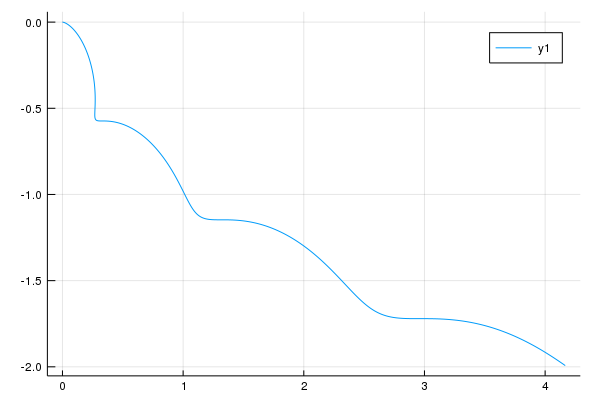

In [52]:
plot(sol[1,:],sol[2,:])

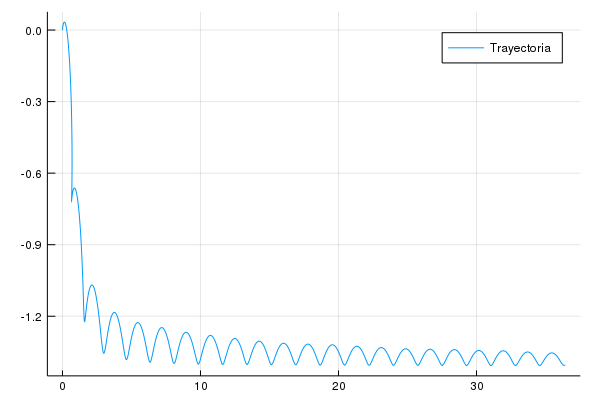

In [68]:
x0 = 0.0 
y0 = 0.0 
z0 = 0.0 
dx0 = 0.0 
dy0 = 0.0
dz0 = 0.0
posicion0 = [x0, y0, z0, dx0, dy0, dz0] 
tspan = (0.0,7.0)
magnetico = 5
voltaje_x = 3 
vhall = magnetico

prob = ODEProblem(florentz,posicion0,tspan) 
sol = solve(prob; save_everystep = true, saveat=0.01)
plot(sol[1,:],sol[2,:], label="Trayectoria")

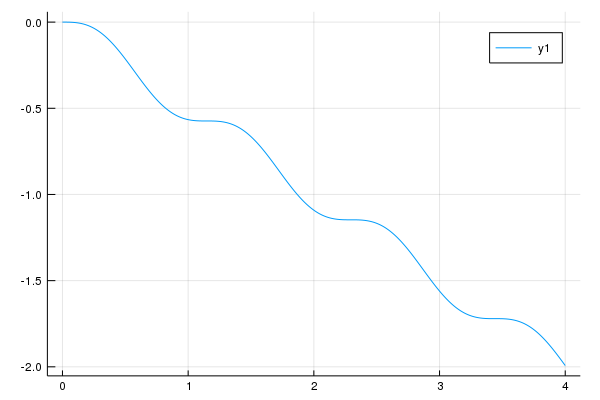

In [54]:
plot(sol.t,sol[2,:])